<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:150%; font-family:Lobster; background-color:#FF6868; overflow:hidden"><b> HeartDiseasePredictor: A Machine Learning Tool for Early Intervention 🫀 </b></div>

`Author:` [Phuong Phan](https://github.com/FahadUrRehman07)\
`Date:` 14.July.2024\
`Dataset:` [📈 Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

### `INSPIRATION OF THE PROJECT`

> The devastating impact of heart disease, a leading cause of death, has long been a subject of concern for healthcare professionals and researchers alike. However, accurate prediction of heart disease remains a significant challenge, hindering our ability to identify high-risk individuals and provide timely interventions. This project embarks on a journey to develop a machine learning model capable of predicting heart disease using a comprehensive dataset of key indicators, leveraging the power of machine learning and data analysis to revolutionize the field of healthcare


![HeartDiseasePredictor](https://www.heart.org/-/media/Images/News/2019/July-2019/0725LifeExpectancy_SC.jpg?h=600&w=800)

`Problem Statement`

> Heart disease is a leading cause of death with millions of people affected annually.

> The lack of an efficient and accurate system for predicting heart disease hinders early intervention and prevention, leading to poor health outcomes and increased healthcare costs

> A machine learning-based approach to predicting heart disease can revolutionize the healthcare industry, enabling healthcare professionals to identify high-risk individuals and provide timely interventions that improve health outcomes and reduce costs

`About Dataset`
    This comprehensive dataset, comprising over 400,000 adult profiles, captures the diverse health status of individuals across various demographics and risk factors. The data was collected from the CDC's Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to collect data on the health status of U.S. residents. To ensure data quality and diversity, the dataset was preprocessed using techniques such as feature scaling, normalization, and handling missing values. This robust dataset provides an ideal foundation for developing and validating high-performance machine learning models for predicting heart disease.

### `Methodology`

> **EDA**: Summarize main characteristics of the dataset. Using various visualizations techniques and statistical methods to identify patterns, outliers, and correlations. 
> 
> **Data Preprocessing**: Applying PCA to the training features. Normalizing categorical labels using TF function. Then finally shuffling dataset to increase randomness and reduce the likelihood of bias in the training process.
> 
> **Evaluation**: Using classification report from Scikit-learn to evaluate the performance of the trained model. Graphically visualizing the performance of 13 models on the validation data.
> 
> **Hyperparameter Tuning**: Taking best hyperparameters of BayesSearchCV, RandomSearchCV as inputs. A function is then defined to re-train a model with the Random Forest & XGBoost backbone. A shallow neural network FNN's is also created. 
> 
> **Prediction**: Predicting on new, unseen patient data from a random sample from the test set, and identifying high-risk individuals for heart disease.

<div style="font-family: 'Bodoni Moda SC', cursive;text-align: center; background-color: #FF6868; font-size: 150%; color: white; padding: 14px; border-radius: 14px">Installing Required Libraries</div>

In [30]:
!pip install kaggle -q kaggle
!kaggle datasets download -d kamilpytlak/personal-key-indicators-of-heart-disease

Dataset URL: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
License(s): CC0-1.0




  0%|          | 0.00/21.4M [00:00<?, ?B/s]
  5%|4         | 1.00M/21.4M [00:01<00:20, 1.02MB/s]
  9%|9         | 2.00M/21.4M [00:01<00:15, 1.33MB/s]
 14%|#3        | 3.00M/21.4M [00:02<00:13, 1.48MB/s]
 19%|#8        | 4.00M/21.4M [00:02<00:10, 1.70MB/s]
 23%|##3       | 5.00M/21.4M [00:03<00:12, 1.42MB/s]
 28%|##7       | 6.00M/21.4M [00:04<00:13, 1.21MB/s]
 33%|###2      | 7.00M/21.4M [00:05<00:13, 1.12MB/s]
 37%|###7      | 8.00M/21.4M [00:07<00:14, 999kB/s] 
 42%|####1     | 9.00M/21.4M [00:08<00:13, 956kB/s]
 47%|####6     | 10.0M/21.4M [00:09<00:13, 861kB/s]
 51%|#####1    | 11.0M/21.4M [00:11<00:12, 852kB/s]
 56%|#####5    | 12.0M/21.4M [00:12<00:12, 792kB/s]
 61%|######    | 13.0M/21.4M [00:14<00:12, 712kB/s]
 65%|######5   | 14.0M/21.4M [00:16<00:11, 664kB/s]
 70%|######9   | 15.0M/21.4M [00:17<00:09, 679kB/s]
 75%|#######4  | 16.0M/21.4M [00:19<00:08, 701kB/s]
 79%|#######9  | 17.0M/21.4M [00:20<00:06, 688kB/s]
 84%|########3 | 18.0M/21.4M [00:22<00:05, 685kB/s]
 89%|######

In [64]:
import shutil
shutil.unpack_archive('personal-key-indicators-of-heart-disease.zip', '.', 'zip')

In [101]:
import warnings

warnings.filterwarnings('ignore')
## Data ##
import numpy as np
import pandas as pd
import os
import sys
import json
import pathlib

## Image ##
#import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL
from PIL import Image


## Tensorflow ##
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, UpSampling2D,\
                                     Dropout, Flatten, Reshape, BatchNormalization, RandomFlip, RandomRotation, Rescaling, Resizing,\
                                        Input, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications import EfficientNetB0

from tensorflow.keras.utils import image_dataset_from_directory

## Visualization ##
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, Javascript, Image, YouTubeVideo

from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow.keras.layers as tfl
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
pip install --upgrade imbalanced-learn

In [134]:
!pip install -U -q ydf
import ydf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,\
                            accuracy_score, precision_score, recall_score, f1_score
from collections import Counter

In [299]:
cwd = os.path.abspath('.')

PATH = cwd
os.listdir(PATH)

df = pd.read_csv(PATH + '/2022/heart_2022_with_nans.csv')

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#FF6868; overflow:hidden"><b> Data Content  </b></div>

In [300]:
display(df.head())
print(30*"-","SHAPE",30*"-")
df.shape

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


------------------------------ SHAPE ------------------------------


(445132, 40)

In [303]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,434205.0,4.347919,8.688912,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,436065.0,4.382649,8.387475,0.00,0.00,0.00,5.00,30.00
SleepHours,439679.0,7.022983,1.502425,1.00,6.00,7.00,8.00,24.00
HeightInMeters,416480.0,1.702691,0.107177,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,403054.0,83.074470,21.448173,22.68,68.04,80.74,95.25,292.57
BMI,396326.0,28.529842,6.554889,12.02,24.13,27.44,31.75,99.64


# `Missing value analysis`

In [305]:
print(df.isnull().sum())
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.info()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#FF6868; overflow:hidden"><b> Exploratory Data Analysis (EDA)  </b></div>

In [306]:
print(30*"-","COLUMNS",30*"-")
display(df.columns)
print(30*"-","SHAPE",30*"-")
df.shape

------------------------------ COLUMNS ------------------------------


Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

------------------------------ SHAPE ------------------------------


(246013, 40)

In [117]:
df['HadHeartAttack'].value_counts()

HadHeartAttack
No     232578
Yes     13435
Name: count, dtype: int64

In [119]:
df.shape[1]

40

In [121]:
class_names = np.unique(df['HadHeartAttack'])
n_classes = len(class_names)
print(class_names)

['No' 'Yes']


# ` Distribution of all Variables`

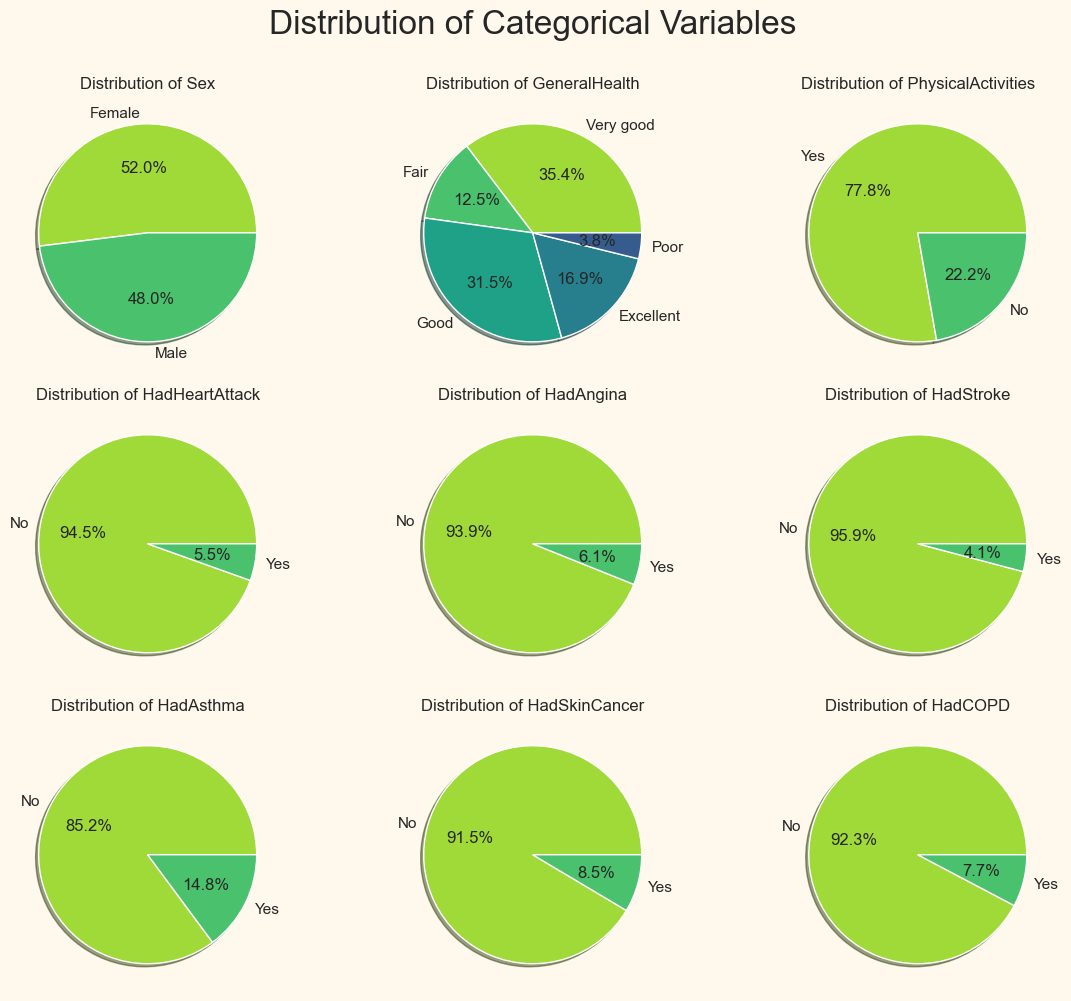

In [438]:
palette = sns.color_palette('viridis_r')
plt.figure(figsize=(12, 10))
plotnumber = 1

for col in cotchu:
    if plotnumber > 9:
        break
    plt.subplot(3, 3, plotnumber)
    plt.pie(x = list(Counter(df[col]).values()), labels = list(Counter(df[col]).keys()), autopct = "%.1f%%", shadow = True, colors = palette)
    plt.title(f'Distribution of {col}')
    plotnumber += 1
    
plt.suptitle('Distribution of Categorical Variables', fontsize=24, y=1)
plt.tight_layout()
plt.show()

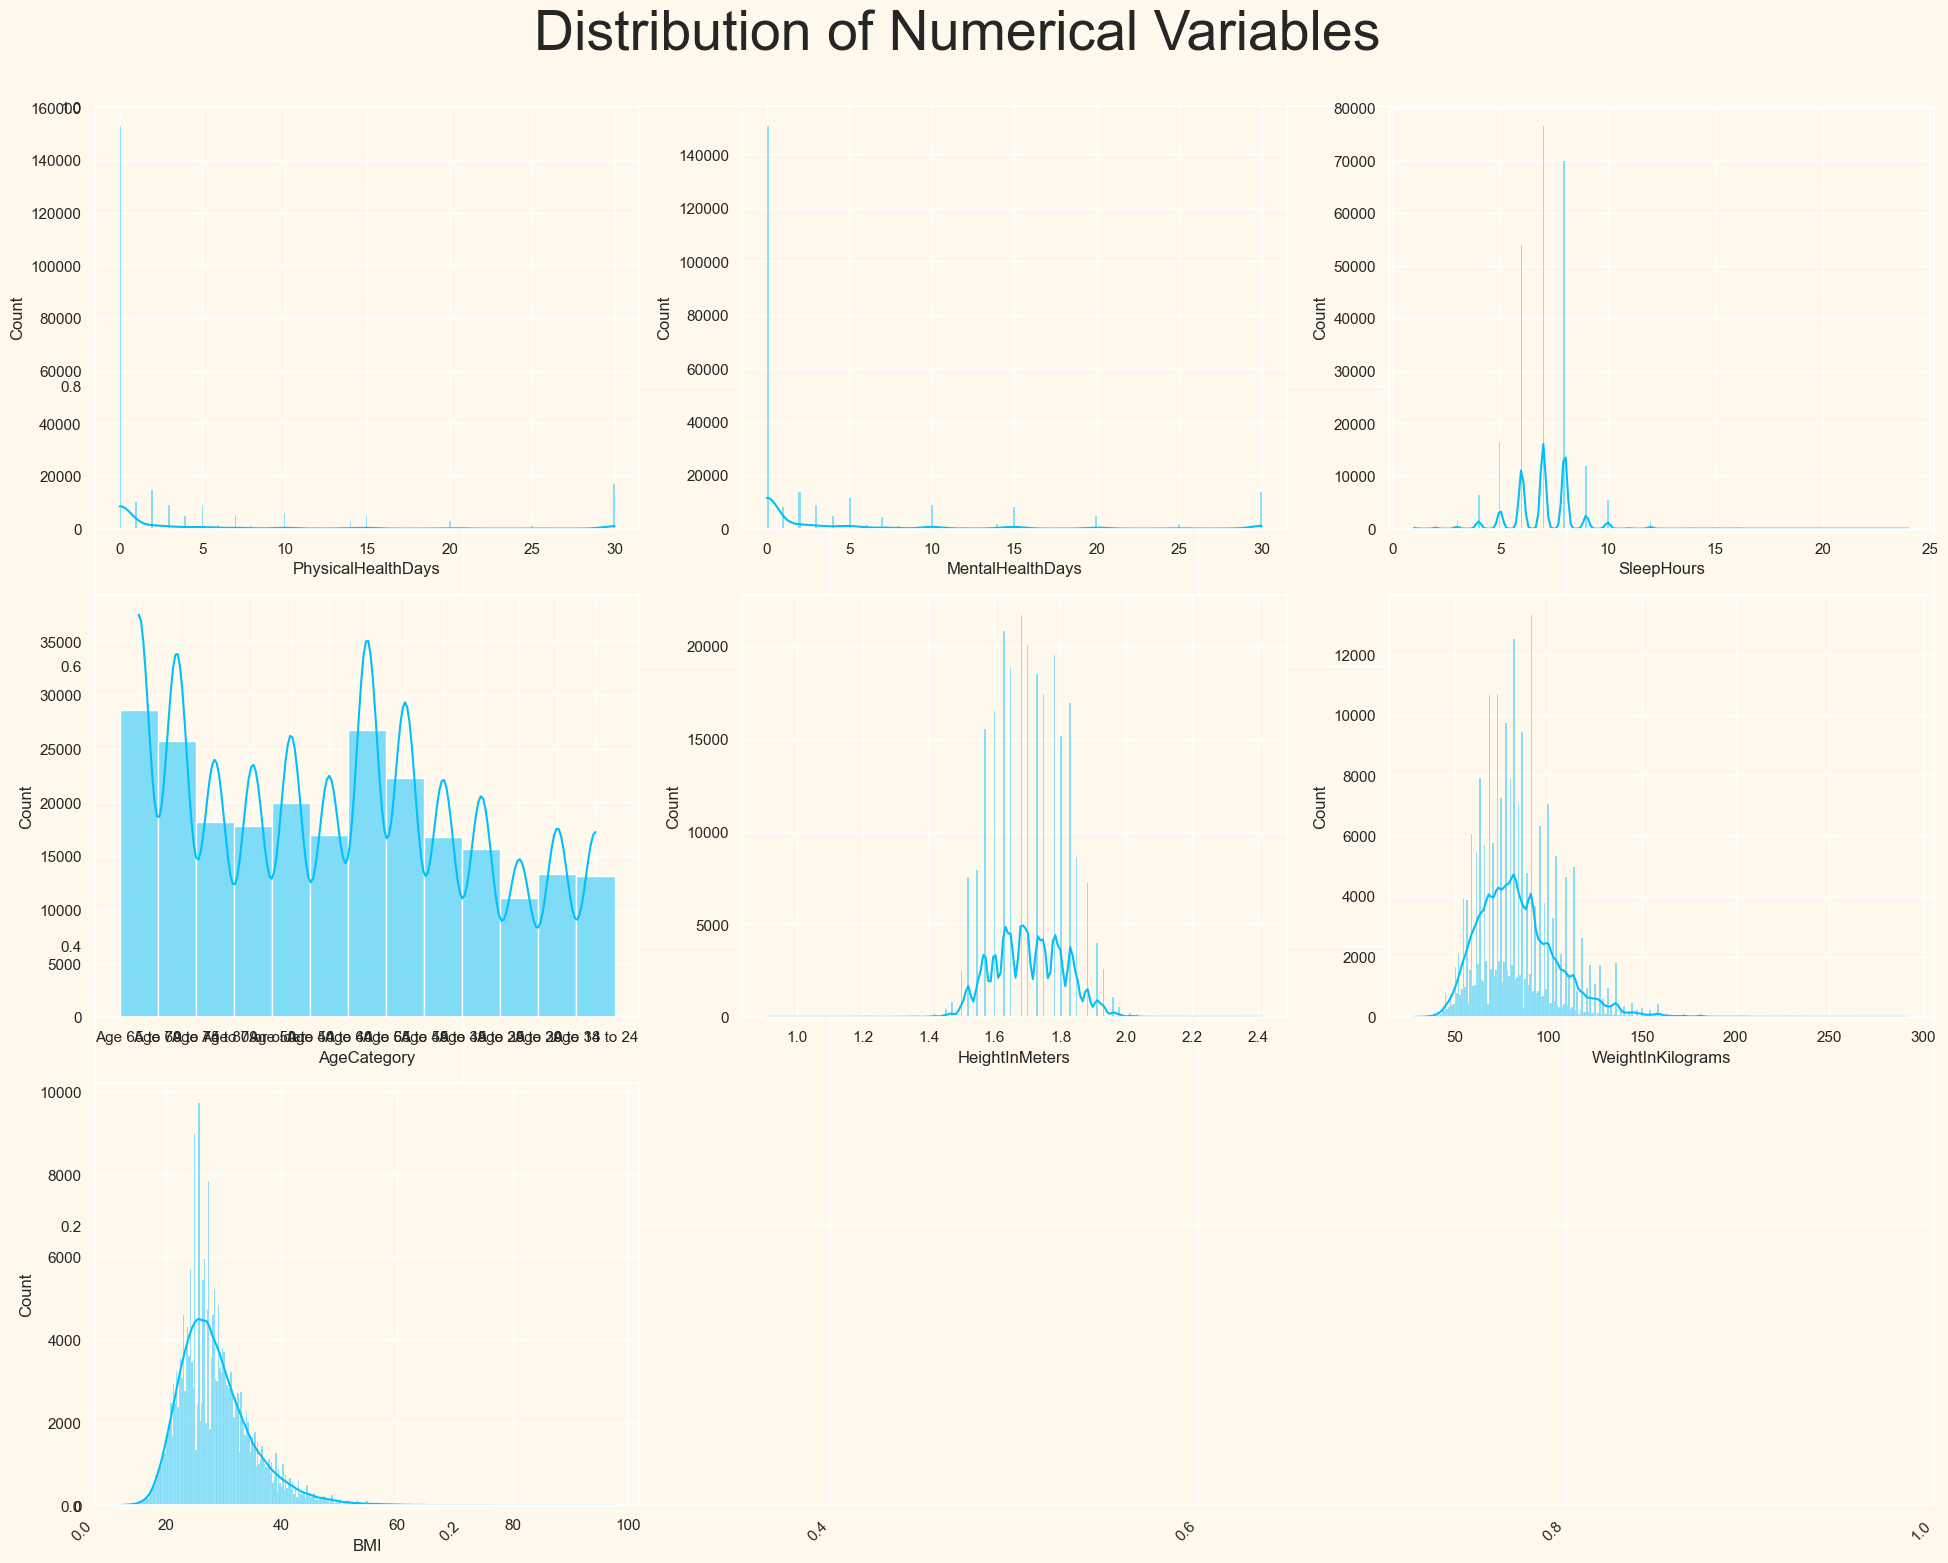

In [415]:
# Distribution of numerical columns
plt.figure(figsize=(20, 16))
plotnumber = 1
plt.xticks(rotation=45, ha='right')
for col in df.columns:
    # Check if the number of unique values is less than 5
    if df[col].nunique() > 5:
        plt.subplot(3, 3, plotnumber)
        sns.histplot(df[col], kde=True, color='deepskyblue')
        plt.xlabel(col)

        plotnumber += 1

plt.suptitle('Distribution of Numerical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

# `Distribution of Target Variable`

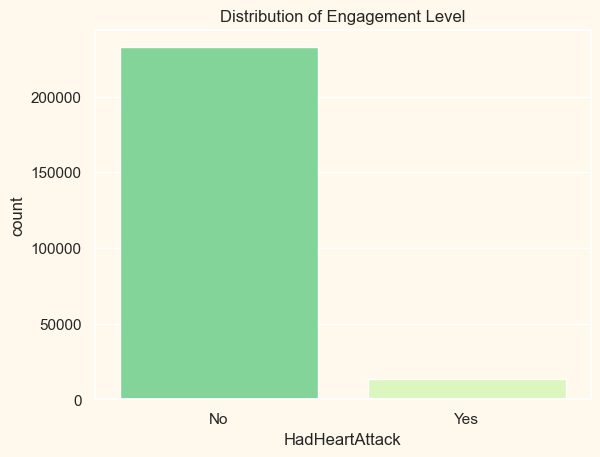

In [432]:
# Check the distribution of the target variable
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
palette = sns.color_palette('viridis_r')
palette = ['#74E291','#DCFFB7', '#FF7777','#C6EBC5', '#ECFFE6']


#for p in ax.patches:
    #ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

sns.countplot(x='HadHeartAttack', data=df, palette= palette)
plt.title('Distribution of Engagement Level')
plt.show()

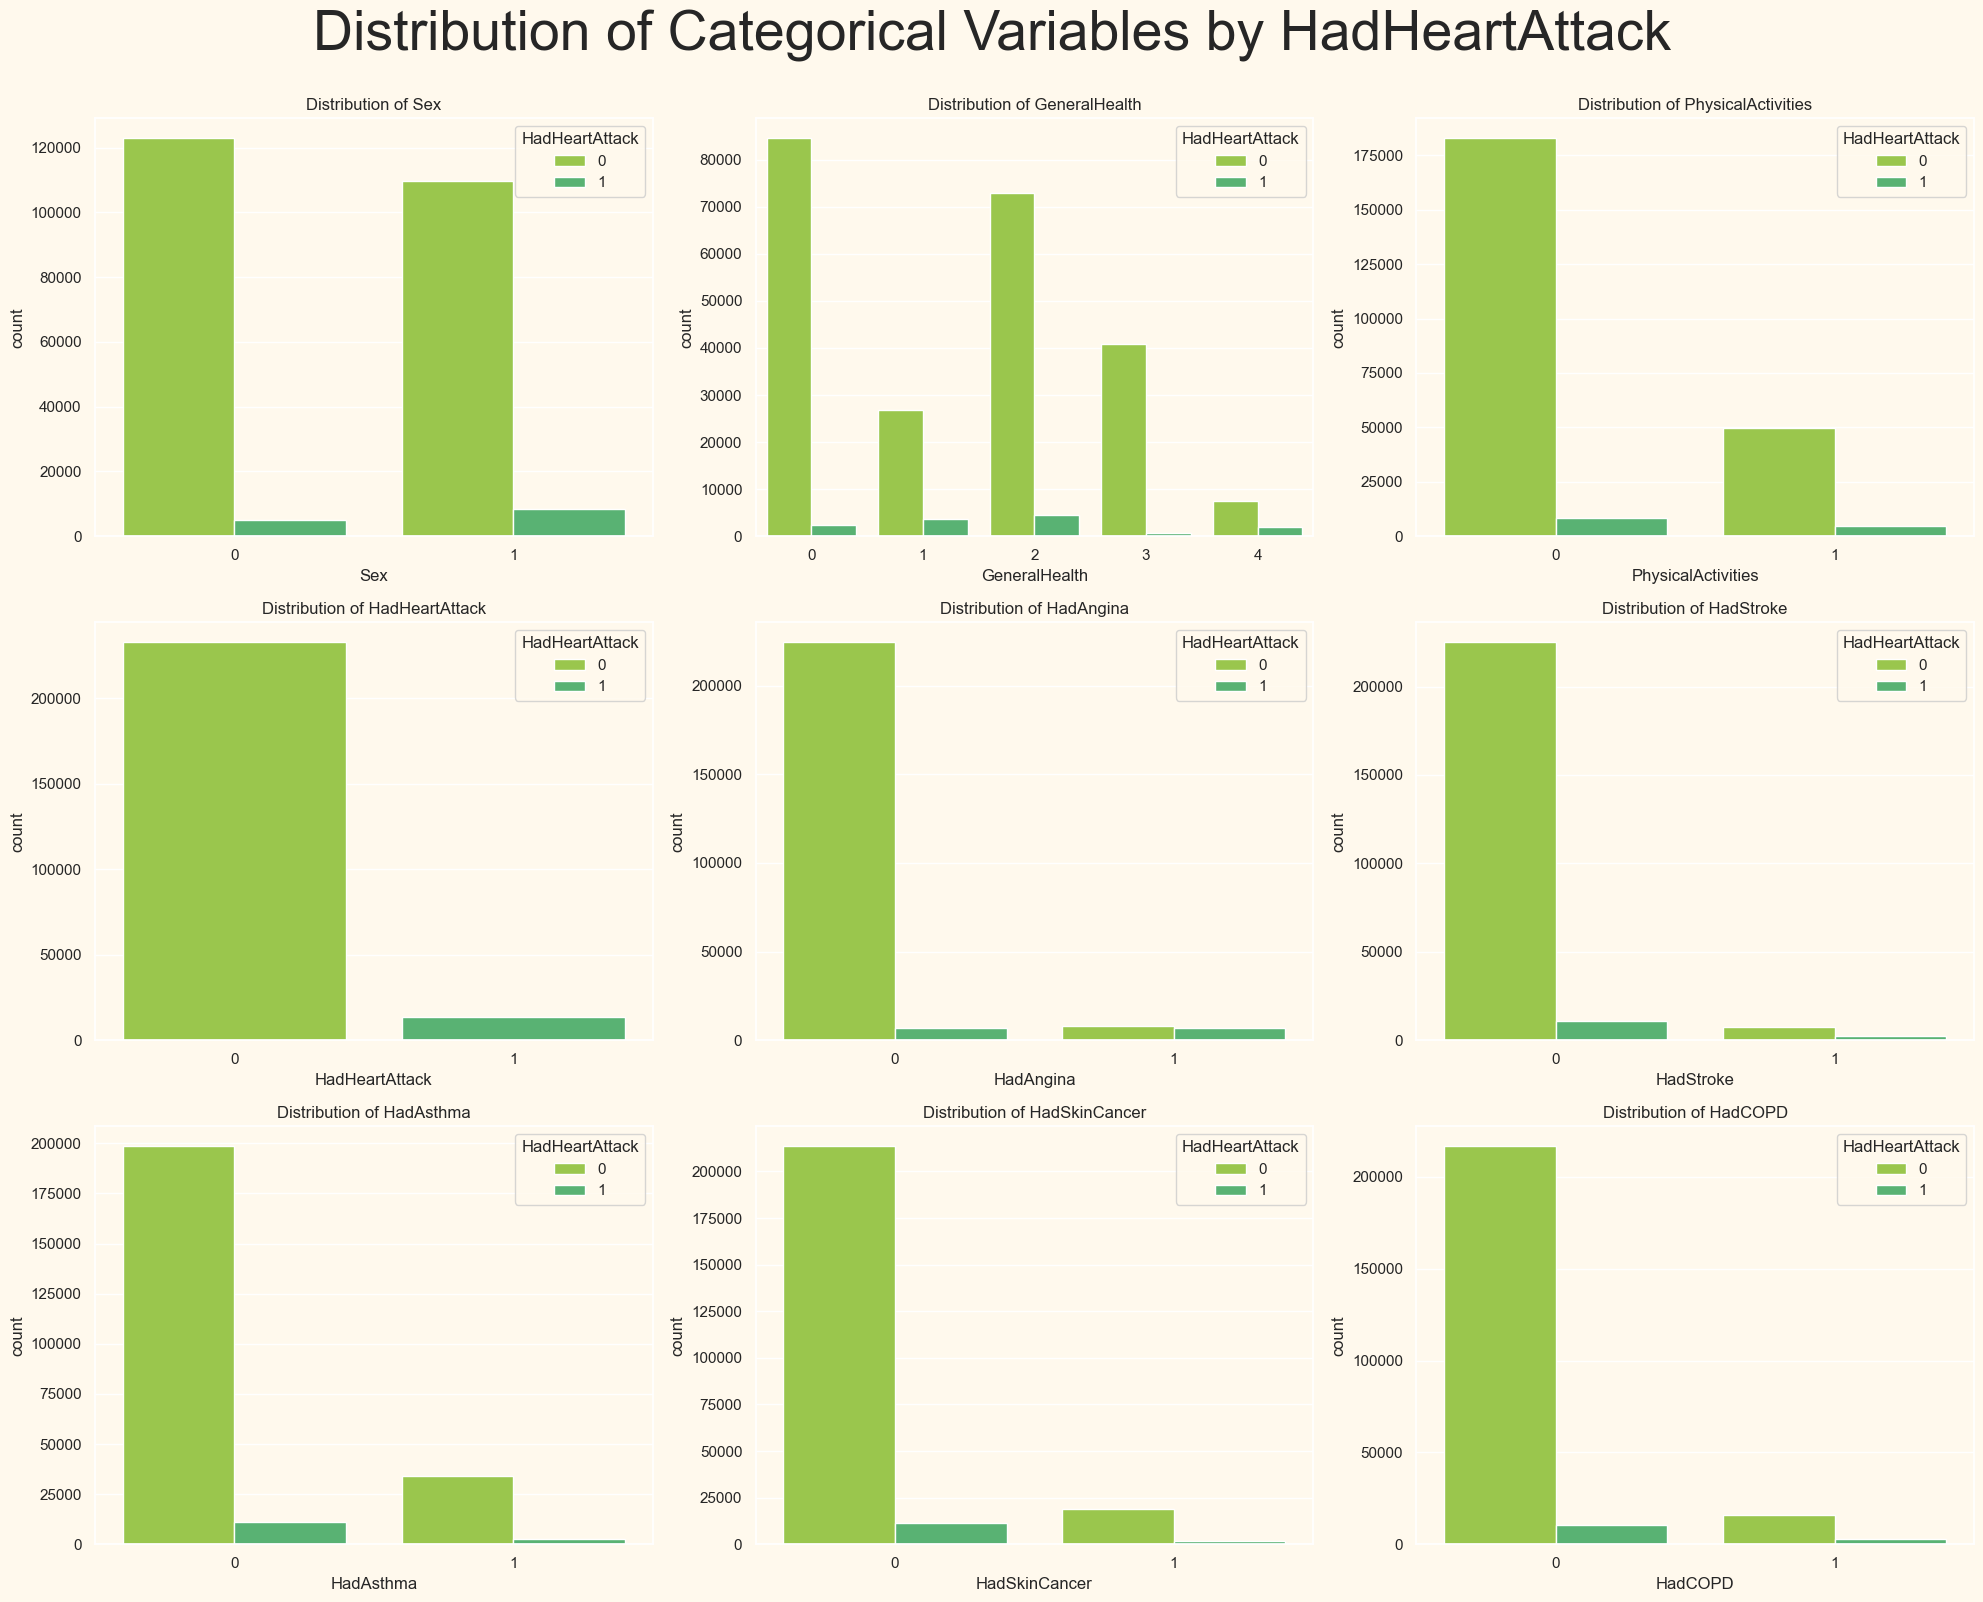

In [495]:
# Distribution of categorical columns
plt.figure(figsize=(20, 16))
plotnumber = 1

for col in cotchu:
    if plotnumber > 9:
        break
    plt.subplot(3, 3, plotnumber)  # Create subplots for better organization
    sns.countplot(x=col, data=df, hue = df['HadHeartAttack'], palette=palette)  # Create a countplot for each categorical column
    plt.title(f'Distribution of {col}')  # Set title for each subplot
    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables by HadHeartAttack', fontsize=40, y=1)
plt.tight_layout()
plt.show()

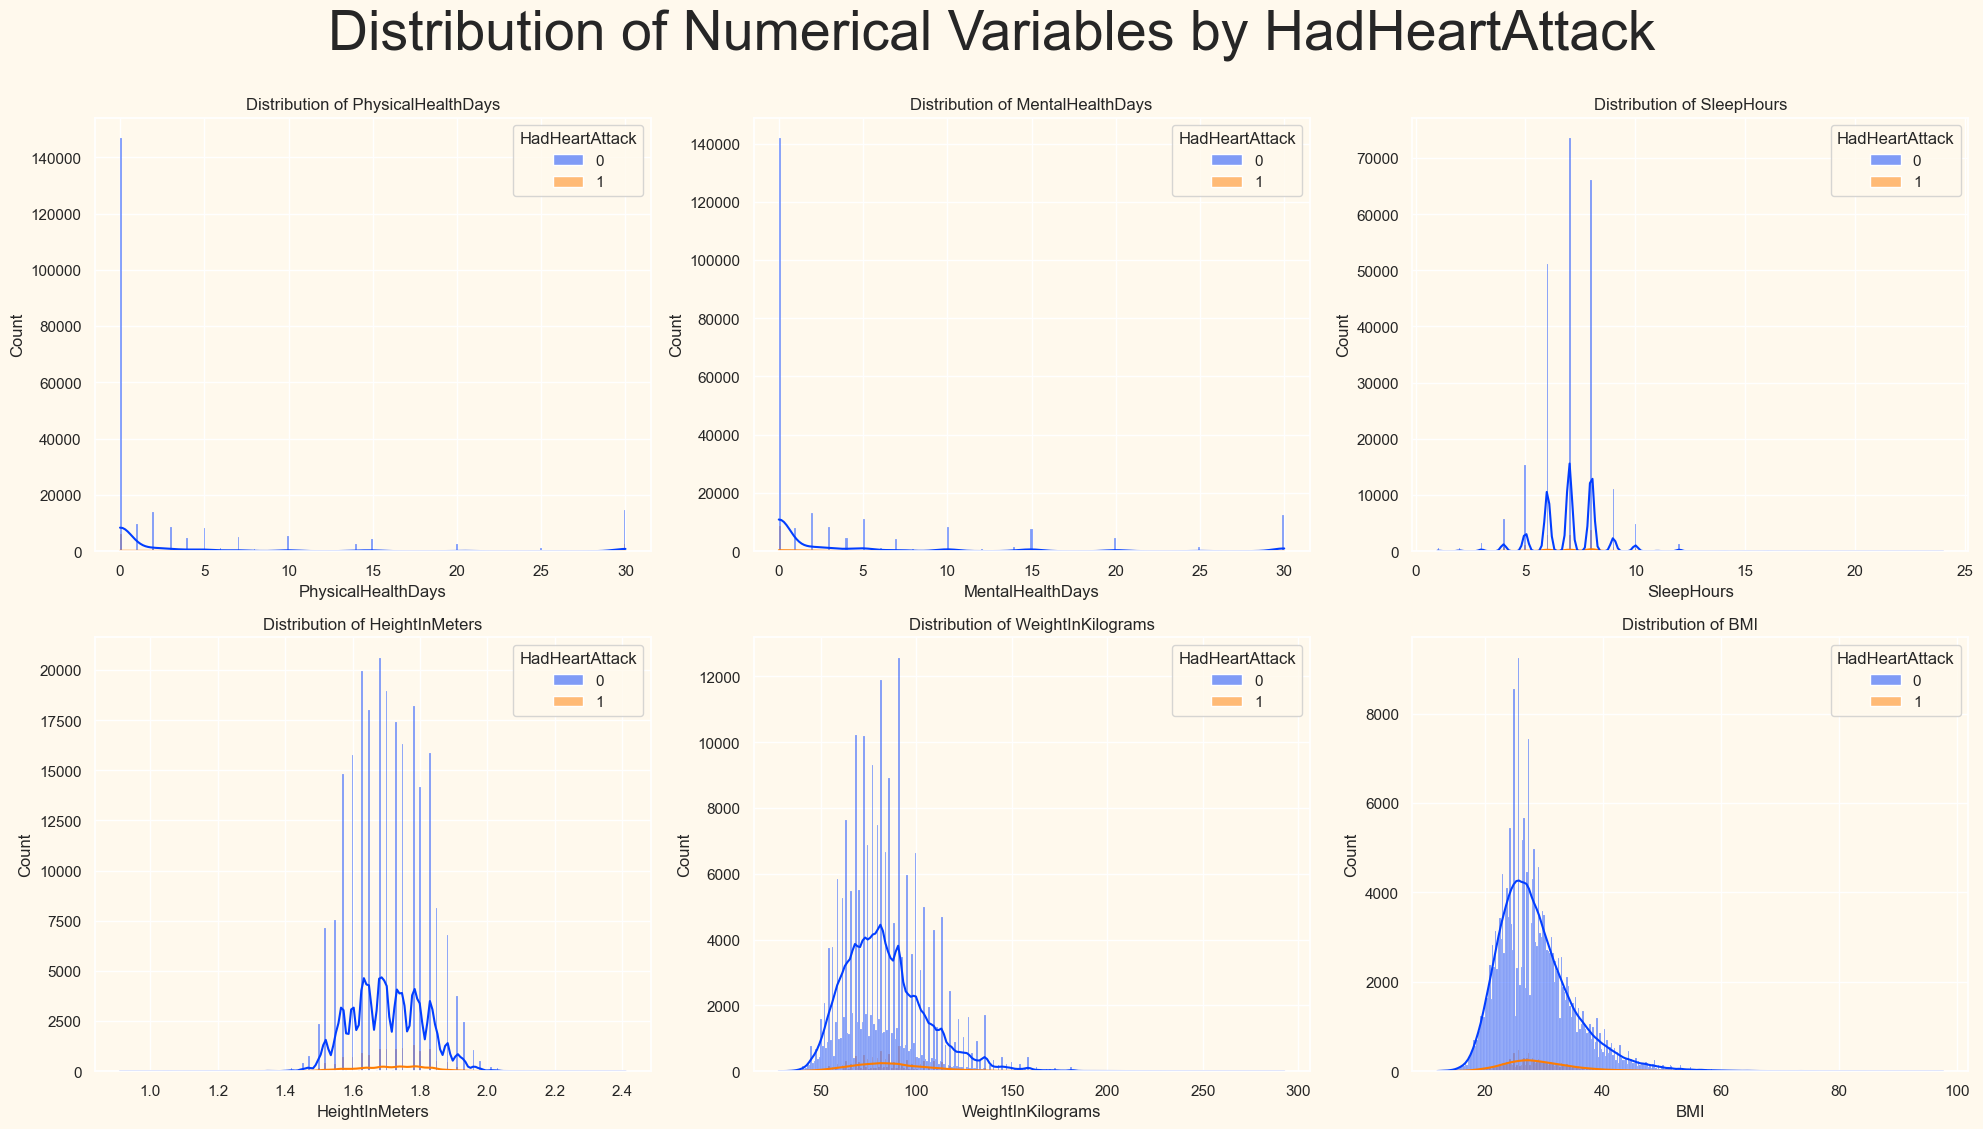

In [499]:
# Distribution of categorical columns
plt.figure(figsize=(20, 16))
plotnumber = 1

for col in cotso:
    plt.subplot(3, 3, plotnumber)  # Create subplots for better organization
    sns.histplot(x=col, kde=True, data=df, hue = df['HadHeartAttack'], palette='bright')  # Create a countplot for each categorical column
    plt.title(f'Distribution of {col}')  # Set title for each subplot
    plotnumber += 1

plt.suptitle('Distribution of Numerical Variables by HadHeartAttack', fontsize=40, y=1)
plt.tight_layout()
plt.show()

# `Distribution of BMI`

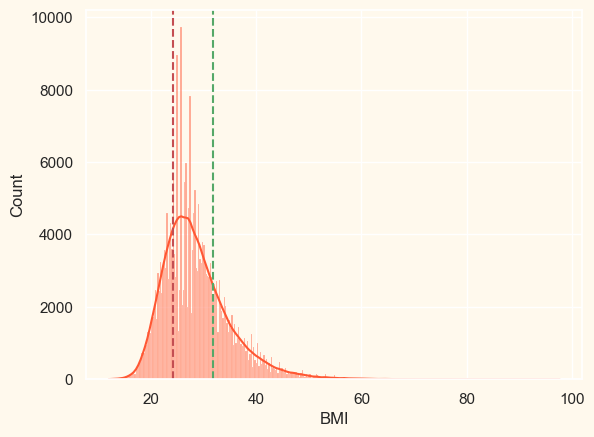

In [347]:
custom_colors = ["#FF5733", "#3366FF", "#33FF57"]

# Get the 25th and 75th quantiles of the data
quantile_25 = df['BMI'].quantile(0.25)
quantile_75 = df['BMI'].quantile(0.75)

sns.histplot(df['BMI'], kde=True, color="#FF5733", palette=custom_colors)

# Draw lines representing the quantiles at 0.25 and 0.75
plt.axvline(x=quantile_25, color='r', linestyle='--', label='Quantile 0.25')
plt.axvline(x=quantile_75, color='g', linestyle='--', label='Quantile 0.75')

# `Distribution of General Health`

In [355]:
df['GeneralHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

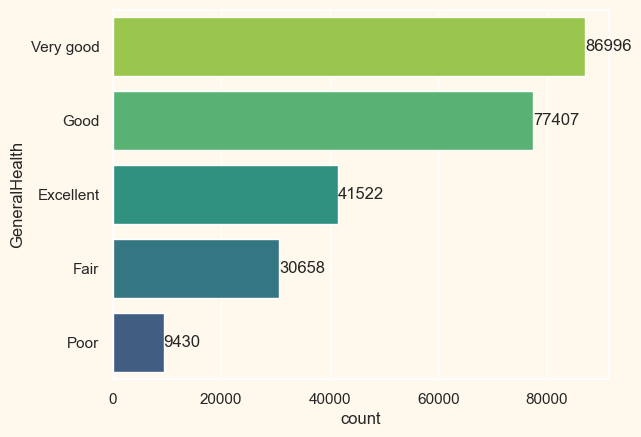

In [450]:
figure = sns.countplot(y = df['GeneralHealth'], order=df['GeneralHealth'].value_counts().index, palette = palette)
for contain in figure.containers :
    figure.bar_label(contain)

# `Distribution of Gender`

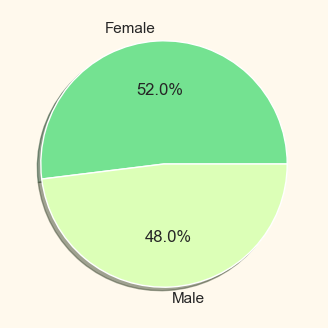

In [370]:
palette = sns.color_palette(palette, len(df['Sex'].unique()))
plt.figure(figsize=(4,4))
plt.pie(x = list(Counter(df['Sex']).values()), labels = list(Counter(df['Sex']).keys()), autopct = "%.1f%%", shadow = True, colors = palette)
plt.show()

In [313]:
cotchu = df.select_dtypes(include = ['object','category']).columns #.tolist()
cotso = df.select_dtypes(exclude = ['object','category']).columns #cotso = data.select_dtypes(include = ['float64','int']).columns.difference(['species'])
print(cotchu,'\n',cotso)

Index(['Sex', 'GeneralHealth', 'PhysicalActivities', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'SmokerStatus', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos'],
      dtype='object') 
 Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')


# `Sleep Hours of Heart Attack Dicease Level on with Patient Health`

<Axes: xlabel='HadHeartAttack', ylabel='SleepHours'>

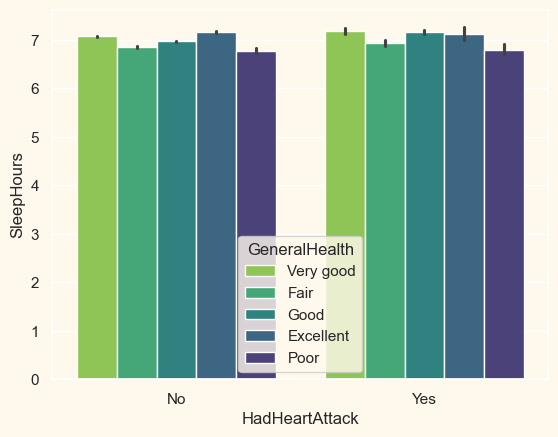

In [428]:
sns.barplot(data=df,x='HadHeartAttack',y='SleepHours',hue='GeneralHealth', palette = 'viridis_r')

# `HeartAttack Dicease on Depressive Disorder`

<Axes: xlabel='HadHeartAttack', ylabel='MentalHealthDays'>

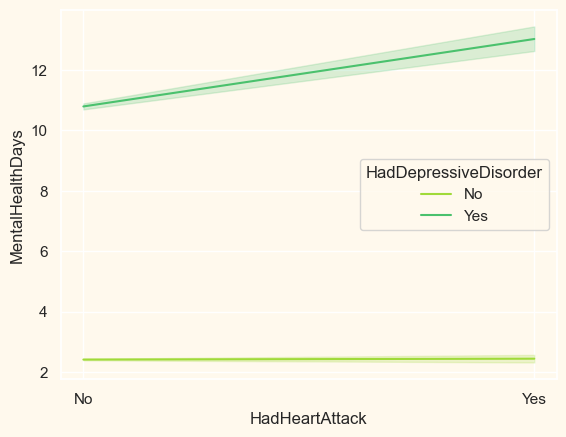

In [442]:
sns.lineplot(data=df,x='HadHeartAttack',y='MentalHealthDays',hue='HadDepressiveDisorder', palette = sns.color_palette('viridis_r'))

# `Frequency of HeartAttack Dicease with different age's BMI  `

<Axes: xlabel='AgeCategory', ylabel='BMI'>

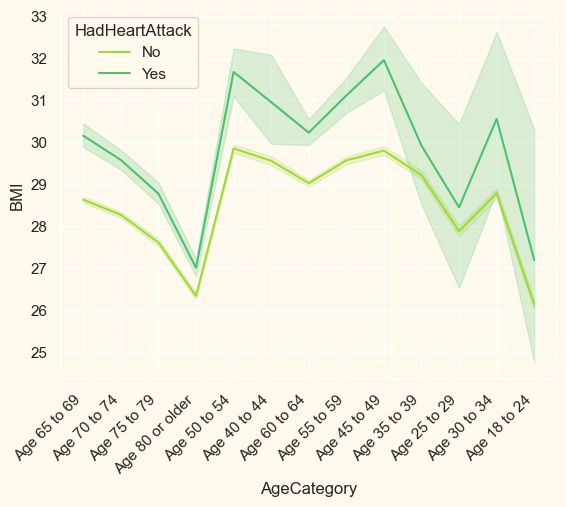

In [444]:
plt.xticks(rotation=45, ha='right')
sns.lineplot(data=df,x='AgeCategory',y='BMI',hue='HadHeartAttack',palette = sns.color_palette('viridis_r'))

# `Patient index on HeartAttack Dicease `

<Axes: xlabel='Sex', ylabel='AgeCategory'>

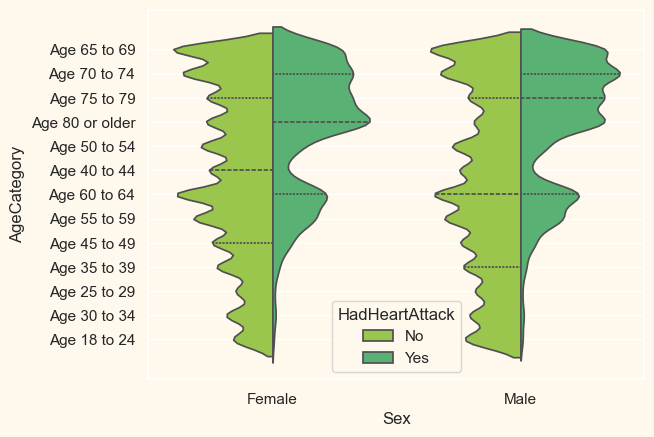

In [448]:
sns.violinplot(data=df, x="Sex", y="AgeCategory", hue="HadHeartAttack",
               split=True, inner="quart",palette = sns.color_palette('viridis_r'))

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#FF6868; overflow:hidden"><b> Data Preprocessing  </b></div>

In [309]:
columns = ['State','DeafOrHardOfHearing','LastCheckupTime', 'RemovedTeeth', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking',
           'DifficultyDressingBathing', 'DifficultyErrands', 'ECigaretteUsage', 'ChestScan', 'HIVTesting', 'FluVaxLast12', 'TetanusLast10Tdap']

df.drop(columns, axis=1, inplace=True)

In [311]:
cotchu = df.select_dtypes(include = ['object','category']).columns #.tolist()
cotso = df.select_dtypes(exclude = ['object','category']).columns #cotso = data.select_dtypes(include = ['float64','int']).columns.difference(['species'])
print(cotchu,'\n',cotso)

Index(['Sex', 'GeneralHealth', 'PhysicalActivities', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'SmokerStatus', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos'],
      dtype='object') 
 Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')


In [476]:
# Handling categorical
def auto_map_categorical(df, cols):
    for col in cols:
        df[col], _ = pd.factorize(df[col])
auto_map_categorical(df, cotchu)
print(df[cotchu])

        Sex  GeneralHealth  PhysicalActivities  HadHeartAttack  HadAngina  \
342       0              0                   0               0          0   
343       1              0                   0               0          0   
345       1              0                   1               0          0   
346       0              1                   0               0          0   
347       0              2                   0               0          0   
...     ...            ...                 ...             ...        ...   
445117    1              0                   0               0          0   
445123    0              1                   0               0          0   
445124    1              2                   0               0          0   
445128    0              3                   0               0          0   
445130    1              0                   1               1          0   

        HadStroke  HadAsthma  HadSkinCancer  HadCOPD  HadDepressiveDisorder

# `Correlation Matrix`

<Axes: title={'center': 'Feature Correlation'}>

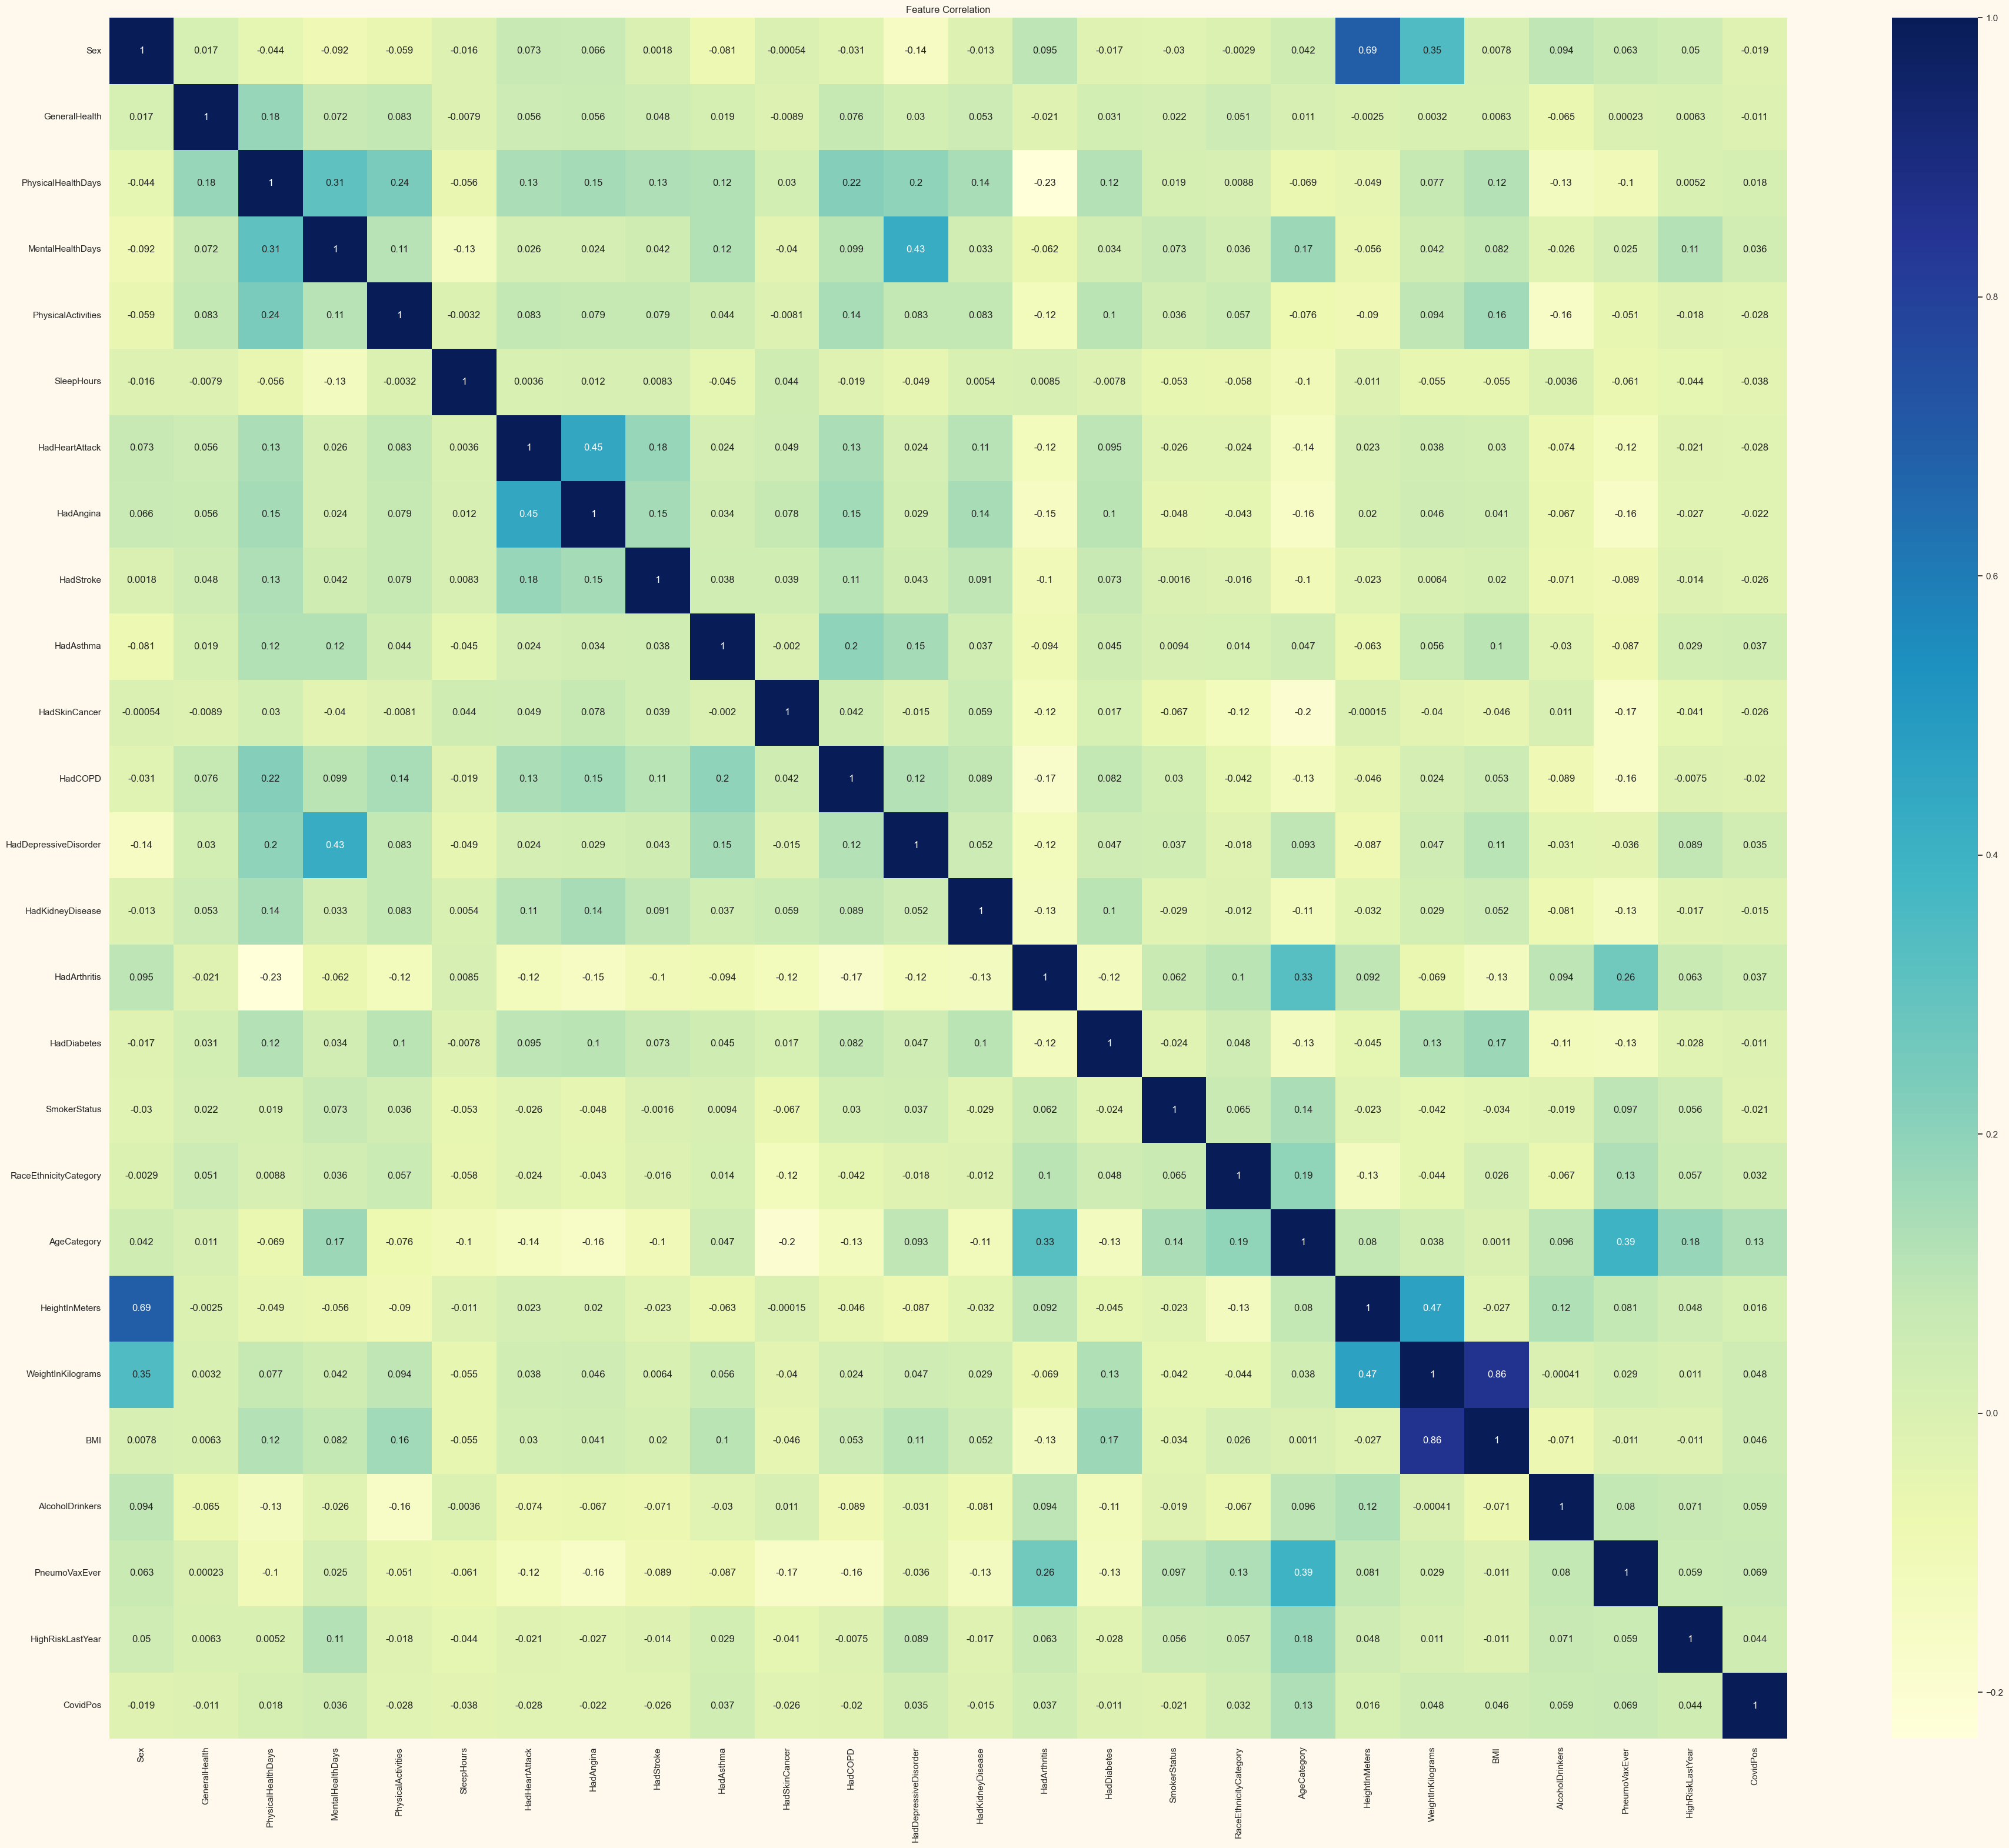

In [478]:
plt.figure(figsize=(46, 38))
plt.title('Feature Correlation')
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#FF6868; overflow:hidden"><b> Prediction By Default Hyperparameters  </b></div>

In [63]:
# Using Wota
!pip install wolta -q
from wolta.model_tools import compare_models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


X = df.drop(['HadHeartAttack'], axis=1)         
y = df['HadHeartAttack']    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 
SEED = 42


clf1 = DecisionTreeClassifier(random_state = SEED)
clf2 = RandomForestClassifier(class_weight = 'balanced', random_state = SEED, n_jobs = -1)
clf3 = ExtraTreesClassifier(bootstrap = True, class_weight = 'balanced', random_state = SEED, n_jobs = -1)
clf4 = GradientBoostingClassifier(random_state = SEED)
clf5 = HistGradientBoostingClassifier(class_weight = 'balanced', random_state = SEED)
clf6 = XGBClassifier(random_state = SEED, n_jobs = -1)
clf7 = LGBMClassifier(class_weight = 'balanced', random_state = SEED, verbosity = -1)
clf8 = CatBoostClassifier(random_state = SEED, verbose = 0)
clf9 = SVC(random_state = SEED)
clf10 = LogisticRegression(random_state = SEED)
clf12 = MLPClassifier(random_state = SEED)
clf13 = AdaBoostClassifier(random_state = SEED)
clf14 = GaussianNB()

MODELS = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, clf10, clf12, clf13, clf14]

results1 = []
for model in MODELS:
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy = lambda y_true, y_pred: accuracy_score(y_true, y_pred)
    precision = lambda y_true, y_pred:precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')


    results1.append([type(model).__name__, accuracy(y_train, y_pred_train), accuracy(y_test, y_pred_test), precision(y_test, y_pred_test), recall, f1])

    
    print(f"{type(model).__name__} | Acc Train: {accuracy(y_train, y_pred_train):.4f} | Acc Test: {accuracy(y_test, y_pred_test):.4f} | Prec Test: {precision(y_test, y_pred_test):.4f}\n")

DecisionTreeClassifier | Acc Train: 0.9999 | Acc Test: 0.9148 | Prec Test: 0.9215

RandomForestClassifier | Acc Train: 0.9998 | Acc Test: 0.9472 | Prec Test: 0.9310

ExtraTreesClassifier | Acc Train: 0.9998 | Acc Test: 0.9478 | Prec Test: 0.9329

GradientBoostingClassifier | Acc Train: 0.9495 | Acc Test: 0.9489 | Prec Test: 0.9367

HistGradientBoostingClassifier | Acc Train: 0.8233 | Acc Test: 0.8202 | Prec Test: 0.9417

XGBClassifier | Acc Train: 0.9574 | Acc Test: 0.9491 | Prec Test: 0.9370

LGBMClassifier | Acc Train: 0.8276 | Acc Test: 0.8228 | Prec Test: 0.9419

CatBoostClassifier | Acc Train: 0.9599 | Acc Test: 0.9488 | Prec Test: 0.9362

SVC | Acc Train: 0.9452 | Acc Test: 0.9462 | Prec Test: 0.8954

LogisticRegression | Acc Train: 0.9467 | Acc Test: 0.9478 | Prec Test: 0.9356

MLPClassifier | Acc Train: 0.9495 | Acc Test: 0.9492 | Prec Test: 0.9359

AdaBoostClassifier | Acc Train: 0.9478 | Acc Test: 0.9479 | Prec Test: 0.9359

GaussianNB | Acc Train: 0.8647 | Acc Test: 0.8647 |

In [91]:
# Select the best model based on testing score
best_model = max(MODELS, key=lambda model: model.score(X_test, y_test))
print(f"Best Model: {type(best_model).__name__}")

Best Model: MLPClassifier


In [92]:
results_df1 = pd.DataFrame(results1, columns=['Model', 'Accuracy_train','Accuracy','Precision','Recall','F1-score'])
print(results_df1)

                             Model  Accuracy_train  Accuracy  Precision  \
0           DecisionTreeClassifier        0.999878  0.914782   0.921532   
1           RandomForestClassifier        0.999817  0.947158   0.930985   
2             ExtraTreesClassifier        0.999832  0.947808   0.932896   
3       GradientBoostingClassifier        0.949489  0.948865   0.936742   
4   HistGradientBoostingClassifier        0.823307  0.820153   0.941717   
5                    XGBClassifier        0.957411  0.949088   0.937035   
6                   LGBMClassifier        0.827575  0.822836   0.941880   
7               CatBoostClassifier        0.959936  0.948824   0.936232   
8                              SVC        0.945176  0.946243   0.895376   
9               LogisticRegression        0.946715  0.947808   0.935577   
10                   MLPClassifier        0.949520  0.949210   0.935937   
11              AdaBoostClassifier        0.947767  0.947869   0.935925   
12                      G

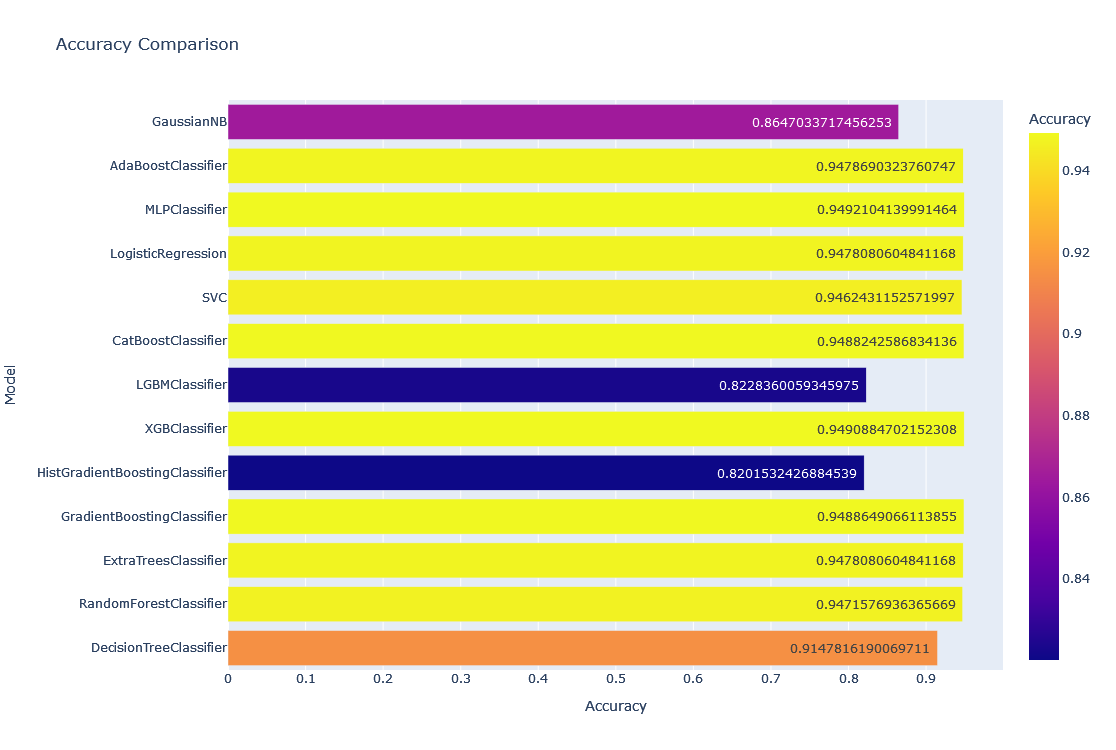

In [97]:
 #Plot
fig = px.bar(data_frame=results_df1, x='Accuracy', y='Model', color='Accuracy',
             title='Accuracy Comparison', text='Accuracy', 
             width=900, height=750)
fig.show()

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#FF6868; overflow:hidden"><b> Moving towards Neural Network (FCNN)  </b></div>

In [284]:
X = df.drop(['HadHeartAttack'], axis=1)         
y = df['HadHeartAttack']   

from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)  # retain components that explain at least 90% of variance
X= pca.fit_transform(X)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, shuffle = True) 
print(pca.explained_variance_ratio_)
print(pca.components_.shape) 


[0.74456138 0.13562399 0.0731432 ]
(3, 25)


In [286]:
X_train.shape

(196810, 3)

In [315]:
#y_train = to_categorical(y_train, num_classes=2)
#y_test = to_categorical(y_test, num_classes=2)

model = Sequential([              
                    BatchNormalization(),
                    
                    Dense(32, activation='relu', input_shape=(25,)),
                    Flatten(),
                    Dropout(0.2), 

                    BatchNormalization(),
                	      
                    Flatten(),
                    Dense(16, activation='relu'),
                    Dense(2, activation = 'sigmoid')
                    ])     

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=4, batch_size=14, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/4
14058/14058 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9409 - loss: 0.1759 - val_accuracy: 0.9441 - val_loss: 0.1579
Epoch 2/4
14058/14058 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9460 - loss: 0.1543 - val_accuracy: 0.9449 - val_loss: 0.1564
Epoch 3/4
14058/14058 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9465 - loss: 0.1508 - val_accuracy: 0.9461 - val_loss: 0.1548
Epoch 4/4
14058/14058 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9482 - loss: 0.1488 - val_accuracy: 0.9466 - val_loss: 0.1559
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.9468 - loss: 0.1540
Test Accuracy: 94.66%


<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#FF6868; overflow:hidden"><b> Hyperparameter Tuning (Advance)  </b></div>

# `Fine-tune RandomForest`

In [544]:
!pip install scikit-optimize -q
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}

rf = RandomForestClassifier(random_state=42)

clf = BayesSearchCV(rf, params, n_iter=30, cv=5, random_state=42)
clf.fit(X_train, y_train)

print(clf.best_params_)

y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

OrderedDict([('max_depth', 50), ('min_samples_leaf', 10), ('min_samples_split', 5), ('n_estimators', 500)])
Test Accuracy: 94.64%


In [537]:
# Use the best hyperparameters to train a new model
best_model9 = RandomForestClassifier(**clf.best_params_)
best_model9.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model9.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

Test accuracy: 0.9465276507530028


# `Fine-tune XGB`

In [484]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

parameters = {
 'model__max_depth': [3, 5, 7, 9],
 'model__learning_rate': [0.01, 0.1, 0.5, 1],
 'model__n_estimators': [50, 100, 200, 500],
 'model__gamma': [0, 0.1, 0.5, 1],
 'model__subsample': [0.5, 0.8, 1],
 'model__colsample_bytree': [0.5, 0.8, 1],
 'model__reg_alpha': [0, 0.1, 0.5, 1],
 'model__reg_lambda': [0, 0.1, 0.5, 1],
 'model__objective': ['binary:logistic', 'binary:logitraw'],
 'model__eval_metric': ['auc', 'logloss'],
 'model__booster': ['gbtree', 'gblinear'],
 'model__tree_method': ['exact', 'approx', 'hist']}

XGB = XGBClassifier(random_state=42)

XGBf = RandomizedSearchCV(XGB, params, n_iter=30, cv=5, random_state=42)
XGBf.fit(X_train, y_train)

print(XGBf.best_params_)

y_pred = XGBf.predict(X_test)
accuracy = XGBf.score(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}
Test Accuracy: 94.59%


In [541]:
# Use the best hyperparameters to train a new model
best_modelXGB = RandomForestClassifier(**XGBf.best_params_)
best_modelXGB.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_modelXGB.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

Test accuracy: 0.9458976078694389


<div style="display: flex; justify-content: center;">
    <img src="https://i.giphy.com/gEP2k49ndOqJDBSPZl.webp" alt="GIF">
</div>

***I hope you found it informative and engaging. If you enjoyed the content and found it helpful. Your feedback is valuable and encourages me to create more content like this in the future.***